In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.stats as stats
from lmfit import models
from scipy.signal import find_peaks
from itertools import combinations

In [48]:
df_convert = pd.read_csv("Magnetic_field_data/ALL0000/F0000CH4.CSV", header=None, usecols=[3,4])

df01= pd.read_csv("Magnetic_field_data/ALL0001/F0001CH2.CSV", header=None, usecols=[3,4])
df02= pd.read_csv("Magnetic_field_data/ALL0001/F0001CH3.CSV", header=None, usecols=[3,4])

df11 = pd.read_csv("Magnetic_field_data/ALL0002/F0002CH3.CSV", header=None, usecols=[3,4])
df12 = pd.read_csv("Magnetic_field_data/ALL0002/F0002CH4.CSV", header=None, usecols=[3,4])

df21= pd.read_csv("Magnetic_field_data/ALL0003/F0003CH3.CSV", header=None, usecols=[3,4])
df22 = pd.read_csv("Magnetic_field_data/ALL0003/F0003CH4.CSV", header=None, usecols=[3,4])

dd31 = pd.read_csv("Magnetic_field_data/ALL0004/F0004CH3.CSV", header=None, usecols=[3,4])
df32 = pd.read_csv("Magnetic_field_data/ALL0004/F0004CH4.CSV", header=None, usecols=[3,4])

df41 = pd.read_csv("Magnetic_field_data/ALL0005/F0005CH3.CSV", header=None, usecols=[3,4])
df42 = pd.read_csv("Magnetic_field_data/ALL0005/F0005CH4.CSV", header=None, usecols=[3,4])

df01



,3,4
0,0.13380,0.0272
1,0.13381,0.0280
2,0.13382,0.0280
3,0.13383,0.0272
4,0.13384,0.0280
...,...,...
2495,0.15875,0.0312
2496,0.15876,0.0312
2497,0.15877,0.0312
2498,0.15878,0.0312


In [49]:
#fit/find peak converting data
def LinFunc(x, a, b):
    y = a*x+b
    return y

Lin_model = models.Model(LinFunc)
gm1 = models.GaussianModel(prefix="A_")
gm2= models.GaussianModel(prefix="B_")

tot_model = Lin_model + gm1 + gm2

print(f'parameter names: {tot_model.param_names}')
print(f'independent variables: {tot_model.independent_vars}')

parameter names: ['a', 'b', 'A_amplitude', 'A_center', 'A_sigma', 'B_amplitude', 'B_center', 'B_sigma']
independent variables: ['x']


In [50]:
a = (df_convert[4][0]-df_convert[4][len(df_convert[4])-1])/(df_convert[3][0]-df_convert[3][len(df_convert[3])-1])

b = 2.5

[[Model]]
    ((Model(LinFunc) + Model(gaussian, prefix='A_')) + Model(gaussian, prefix='B_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 354
    # data points      = 2500
    # variables        = 8
    chi-square         = 3.58311215
    reduced chi-square = 0.00143785
    Akaike info crit   = -16353.5357
    Bayesian info crit = -16306.9433
    R-squared          = 0.76484669
[[Variables]]
    a:            2.99299304 +/- 0.06326995 (2.11%) (init = 0.6722689)
    b:            0.08516020 +/- 0.00397143 (4.66%) (init = 2.5)
    A_amplitude: -0.00746530 +/- 4.6917e-04 (6.28%) (init = 0.25)
    A_center:     0.15048401 +/- 6.1417e-04 (0.41%) (init = 0.14)
    A_sigma:      0.01970004 +/- 6.8872e-04 (3.50%) (init = 1.8227e-05)
    B_amplitude: -0.06791124 +/- 0.00214939 (3.16%) (init = -0.1)
    B_center:     0.23552046 +/- 4.0428e-04 (0.17%) (init = 0.22)
    B_sigma:      0.04550042 +/- 8.2188e-04 (1.81%) (init = 1.8227e-05)
    A_fwhm:       0.0463900

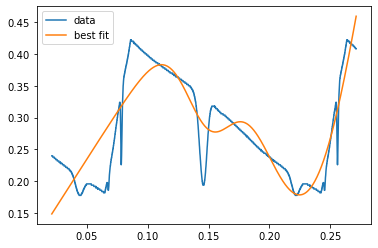

In [51]:
result = tot_model.fit(df_convert[4], x=df_convert[3], a=a, b=b, A_amplitude=0.25, A_center=0.14, A_sigma=1.8227e-05, B_amplitude=-0.1, B_center=0.22, B_sigma=1.8227e-05)



print(result.fit_report())

plt.plot(df_convert[3], df_convert[4], label='data')
#plt.plot(df[9], result.init_fit, '--', label='initial fit')
plt.plot(df_convert[3], result.best_fit, '-', label='best fit')
plt.legend()

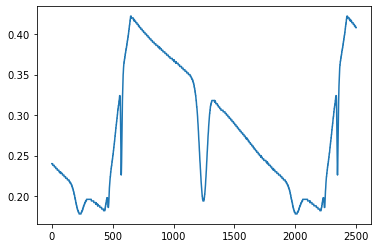

In [75]:
peaks, _ = find_peaks(df_convert[3], height=0.20, threshold=None, distance=10, prominence=(None, 0.21), width=None, wlen=None, rel_height=0.5, plateau_size=None)
#np.diff(peaks)
#array([186, 180, 177, 171, 177, 169, 167, 164, 158, 162, 172])
plt.plot(df_convert[4])
plt.plot(peaks, df_convert[3][peaks], "x")
plt.show()